# Graded Challenge 2
## i. Perkenalan
Nama: Darmawan Wijaya <br>
Kelas : FTDS Batch 2 <br>
Objektif : Melakukan deteksi edge pada gambar dengan konsep gradien dan perkalian matriks

## ii. Import Pustaka yang dibutuhkan
Pustaka yang digunakan pada proyek ini adalah numpy, pandas, matplotlib dan PIL

In [1]:
#Proses Import dari pustaka yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

## iii. Data Loading

Dataset yang digunakan adalah sebuah gambar yang dapat diunduh pada link berikut:<br> https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

Sumber gambar: https://edition.cnn.com/2020/10/30/world/dog-dna-intl-scli-gbr-scn/index.html

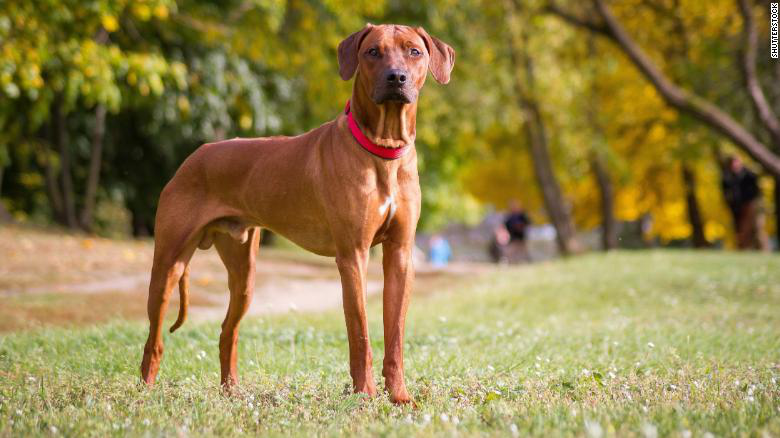

In [2]:
#Proses loading data berupa gambar
img = Image.open('ImageGC2.jpg')
img

## iv. Data Preprocessing
Preprocessing yang dilakukan adalah dengan merubah gambar yang sudah diload menjadi sebuah array

In [3]:
#Proses perubahan gambar menjadi array
img_array=np.asarray(img)
img_array

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [4]:
#Proses pengecekan shape dari gambar yang sudah dikonversi menjadi bentuk array
img_array.shape

(438, 780, 3)

## v. Data Processing
Tahapan dari pemrosesan data yang dilakukan adalah: <br>
    1. Membuat local pixel dari array gambar berupa matriks dengan ukuran sebesar 3x3 <br>
    2. Melakukan perkalian matriks dari local pixel dengan filter x dan y <br>
    3. Metode yang digunakan untuk perhitungan adalah metode Sobel, Prewitt dan Robert <br>
    4. Melakukan perhitungan gradient magnitude dari hasil perkalian matriks dengan filter x dan filter y<br>
    5. Melakukan perkalian dari seluruh array gambar dengan gradient magnitude <br>
    6. Melakukan plotting dalam bentuk gambar dari hasil perkalian array dengan gradient magnitude <br>
    7. Melakukan perbandingan dari hasil metode Sobel, Prewitt dan Robert


In [5]:
#Proses pendefinisian x sebagai jumlah baris, y sebagai jumlah kolom, dan z sebagai jumlah dimensi
x,y,z = img_array.shape

In [6]:
#Proses pendefinisian Sobel filter yang digunakan
sobel_filter_y = [[-1,-2,-1], [0,0,0], [1,2,1]]
sobel_filter_x = [[-1,0,1], [-2,0,2], [-1,0,1]]


In [7]:
#Proses pembuatan copy dari gambar yang sudah dikonversi menjadi array
hasil_edge = img_array.copy()


In [8]:
#Looping formula untuk perkalian keseluruhan local pixel dengan sobel filter
for row in range(3, x-2):
    for col in range(3, y-2):
        
        #Pembuatan local pixel berupa matriks berukuran 3x3
        local_pixels = img_array[row-1:row+2, col-1:col+2, 0]
        
        #Melakukan perkalian dari local pixel terhadap Sobel filter y
        hasil_perkalian_y = sobel_filter_y*local_pixels
        #Penjumlahan dari hasil perkalian y
        nilai_y = hasil_perkalian_y.sum()
        
        #Melakukan perkalian dari local pixel terhadap Sobel filter x
        hasil_perkalian_x = sobel_filter_x*local_pixels
        #Penjumlahan dari hasil perkalian x
        nilai_x = hasil_perkalian_x.sum()
        
        #Melakukan perhitungan gradient magnitude
        gradient_magnitude = (nilai_x**2 + nilai_y**2)**.5
        
        #Melakukan perkalian dari gradient magnitude ke dalam array gambar yang sudah di copy
        hasil_edge[row, col] = [gradient_magnitude]*3

#Melakukan remapping dari array hasil edge
hasil_edge = hasil_edge/hasil_edge.max()

In [9]:
#Pengecekan dI/dx, dI/dy, dan gradient magnitude dengan menggunakan sobel filter
print(nilai_x)
print(nilai_y)
print(gradient_magnitude)

6
14
15.231546211727817


In [10]:
hasil_edge

array([[[0.3372549 , 0.36470588, 0.15294118],
        [0.34509804, 0.36470588, 0.15294118],
        [0.34117647, 0.35294118, 0.12941176],
        ...,
        [0.18823529, 0.16078431, 0.05882353],
        [0.18039216, 0.15294118, 0.03921569],
        [0.23137255, 0.20392157, 0.09019608]],

       [[0.30196078, 0.32941176, 0.11764706],
        [0.30196078, 0.32941176, 0.11764706],
        [0.30588235, 0.3254902 , 0.09803922],
        ...,
        [0.18039216, 0.15294118, 0.05098039],
        [0.25098039, 0.22352941, 0.11372549],
        [0.14509804, 0.11764706, 0.00392157]],

       [[0.25098039, 0.28627451, 0.07843137],
        [0.25882353, 0.28627451, 0.0745098 ],
        [0.26666667, 0.28627451, 0.06666667],
        ...,
        [0.21960784, 0.18823529, 0.09803922],
        [0.17254902, 0.14509804, 0.03529412],
        [0.2745098 , 0.23529412, 0.12941176]],

       ...,

       [[0.64705882, 0.59215686, 0.41568627],
        [0.62352941, 0.56470588, 0.39607843],
        [0.59215686, 0

In [11]:
print(hasil_edge.shape)


(438, 780, 3)


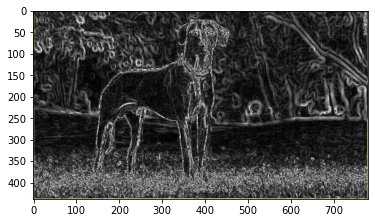

In [12]:
plt.imshow(hasil_edge)

In [13]:
#Proses pendefinisian Prewitt filter yang digunakan
prewitt_filter_y = [[-1,-1,-1], [0,0,0], [1,1,1]]
prewitt_filter_x = [[-1,0,1], [-1,0,1], [-1,0,1]]
prewitt_edge = img_array.copy()


In [14]:
#Looping formula untuk perkalian keseluruhan local pixel dengan Prewitt filter
for row in range(3, x-2):
    for col in range(3, y-2):
        
        #Pembuatan local pixel berupa matriks berukuran 3x3
        prewitt_pixels = img_array[row-1:row+2, col-1:col+2, 0]
        
        #Melakukan perkalian dari local pixel terhadap Prewitt filter y
        prewitt_perkalian_y = prewitt_filter_y*prewitt_pixels
        #Penjumlahan dari hasil perkalian y
        prewitt_y = prewitt_perkalian_y.sum()
        
        #Melakukan perkalian dari local pixel terhadap Prewitt filter x
        prewitt_perkalian_x = prewitt_filter_x*prewitt_pixels
        #Penjumlahan dari hasil perkalian x
        prewitt_x = prewitt_perkalian_x.sum()
        
        #Melakukan perhitungan gradient magnitude
        prewitt_gradient_magnitude = (prewitt_x**2 + prewitt_y**2)**.5
        
        #Melakukan perkalian dari gradient magnitude ke dalam array gambar yang sudah di copy
        prewitt_edge[row, col] = [prewitt_gradient_magnitude]*3

#Melakukan remapping dari array hasil edge
prewitt_edge = prewitt_edge/prewitt_edge.max()

In [15]:
print(prewitt_x)
print(prewitt_y)
print(prewitt_gradient_magnitude)

4
10
10.770329614269007


In [16]:
prewitt_edge

array([[[0.3372549 , 0.36470588, 0.15294118],
        [0.34509804, 0.36470588, 0.15294118],
        [0.34117647, 0.35294118, 0.12941176],
        ...,
        [0.18823529, 0.16078431, 0.05882353],
        [0.18039216, 0.15294118, 0.03921569],
        [0.23137255, 0.20392157, 0.09019608]],

       [[0.30196078, 0.32941176, 0.11764706],
        [0.30196078, 0.32941176, 0.11764706],
        [0.30588235, 0.3254902 , 0.09803922],
        ...,
        [0.18039216, 0.15294118, 0.05098039],
        [0.25098039, 0.22352941, 0.11372549],
        [0.14509804, 0.11764706, 0.00392157]],

       [[0.25098039, 0.28627451, 0.07843137],
        [0.25882353, 0.28627451, 0.0745098 ],
        [0.26666667, 0.28627451, 0.06666667],
        ...,
        [0.21960784, 0.18823529, 0.09803922],
        [0.17254902, 0.14509804, 0.03529412],
        [0.2745098 , 0.23529412, 0.12941176]],

       ...,

       [[0.64705882, 0.59215686, 0.41568627],
        [0.62352941, 0.56470588, 0.39607843],
        [0.59215686, 0

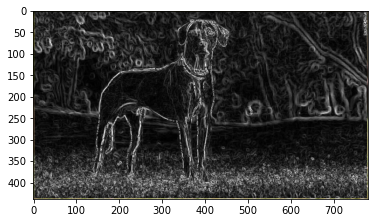

In [17]:
plt.imshow(prewitt_edge)

In [18]:
#Proses pendefinisian Roberts filter yang digunakan
robert_filter_y = [[0,0,0],[0,1,0], [0,0,-1]]
robert_filter_x = [[0,0,0],[0,0,1], [0,-1,0]]
robert_edge = img_array.copy()

In [19]:
#Looping formula untuk perkalian keseluruhan local pixel dengan Roberts filter
for row in range(3, x-2):
    for col in range(3, y-2):
        
        #Pembuatan local pixel berupa matriks berukuran 2x2
        robert_pixels = img_array[row-1:row+2, col-1:col+2, 0]
        
        #Melakukan perkalian dari local pixel terhadap robert filter y
        robert_perkalian_y = robert_filter_y*robert_pixels
        #Penjumlahan dari hasil perkalian y
        robert_y = robert_perkalian_y.sum()
        
        #Melakukan perkalian dari local pixel terhadap robert filter x
        robert_perkalian_x = robert_filter_x*robert_pixels
        #Penjumlahan dari hasil perkalian x
        robert_x = robert_perkalian_x.sum()
        
        #Melakukan perhitungan gradient magnitude
        robert_gradient_magnitude = (robert_x**2 + robert_y**2)**.5
        
        #Melakukan perkalian dari gradient magnitude ke dalam array gambar yang sudah di copy
        robert_edge[row, col] = [robert_gradient_magnitude]*3

#Melakukan remapping dari array hasil edge
robert_edge = robert_edge/robert_edge.max()

In [20]:
print(robert_x)
print(robert_y)
print(robert_gradient_magnitude)

-6
-3
6.708203932499369


In [21]:
robert_edge

array([[[0.3372549 , 0.36470588, 0.15294118],
        [0.34509804, 0.36470588, 0.15294118],
        [0.34117647, 0.35294118, 0.12941176],
        ...,
        [0.18823529, 0.16078431, 0.05882353],
        [0.18039216, 0.15294118, 0.03921569],
        [0.23137255, 0.20392157, 0.09019608]],

       [[0.30196078, 0.32941176, 0.11764706],
        [0.30196078, 0.32941176, 0.11764706],
        [0.30588235, 0.3254902 , 0.09803922],
        ...,
        [0.18039216, 0.15294118, 0.05098039],
        [0.25098039, 0.22352941, 0.11372549],
        [0.14509804, 0.11764706, 0.00392157]],

       [[0.25098039, 0.28627451, 0.07843137],
        [0.25882353, 0.28627451, 0.0745098 ],
        [0.26666667, 0.28627451, 0.06666667],
        ...,
        [0.21960784, 0.18823529, 0.09803922],
        [0.17254902, 0.14509804, 0.03529412],
        [0.2745098 , 0.23529412, 0.12941176]],

       ...,

       [[0.64705882, 0.59215686, 0.41568627],
        [0.62352941, 0.56470588, 0.39607843],
        [0.59215686, 0

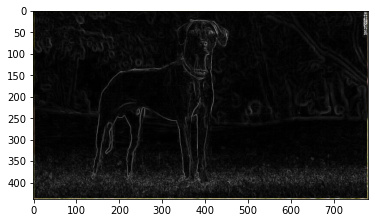

In [22]:
plt.imshow(robert_edge)

## vi. hasil
Berikut dibawah ini adalah perbandingan hasil gradient magnitude untuk masing-masing metode yang digunakan<br>
Dan kemudian juga perbandingan hasil gambar untuk masing-masing metode yang digunakan

In [23]:
#Perbandingan hasil gradient magnitude dengan metode Sobel, Prewitt dan Robert
print("Gradient Magnitude dengan metode Sobel adalah :", gradient_magnitude)
print("Gradient Magnitude dengan metode Prewitt adalah :", prewitt_gradient_magnitude)
print("Gradient Magnitude dengan metode Robert adalah :", robert_gradient_magnitude)

Gradient Magnitude dengan metode Sobel adalah : 15.231546211727817
Gradient Magnitude dengan metode Prewitt adalah : 10.770329614269007
Gradient Magnitude dengan metode Robert adalah : 6.708203932499369


Text(0.5, 1.0, 'Robert Edge')

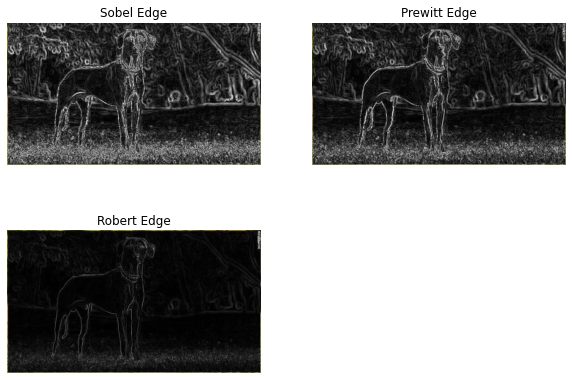

In [24]:
#Perbandingan hasil edge yang sudah diplot kedalam bentuk gambar untuk metode Sobel, Prewitt dan Robert
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(hasil_edge)
plt.axis('off')
plt.title("Sobel Edge")
fig.add_subplot(rows, columns, 2)
plt.imshow(prewitt_edge)
plt.axis('off')
plt.title("Prewitt Edge")
fig.add_subplot(rows, columns, 3)
plt.imshow(robert_edge)
plt.axis('off')
plt.title("Robert Edge")